# Τεχνικές Εξόρυξης Δεδομένων
# Μέλη: 
## 1. Αποστολοπούλου Αλεξάνδρα (1115201700005)
## 2. Μπριάκος Σπυρίδων (1115201700101)
## Εργασία 1η

### Σημείωση:
Υπάρχει περίπτωση να μην εμφανιστεί ο χαρτης σε αυτό το αρχείο. Γι αυτο το αποθηκεύσαμε στο αρχείο map.html, όπου μπορείτε να το δείτε απο εκεί.

In [112]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import folium
from itertools import cycle, islice
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
from pandas import options
import warnings
import tables

In [113]:
options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=tables.NaturalNameWarning)

"""
Read the appropriate columns from listings.csv
and and a new column for month with value
1 (for enable), NaN (for disable)
"""

path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/febrouary/listings.csv'

df1 = pd.read_csv(path, usecols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights'])

df1['month'] = 1

In [114]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/march/listings.csv'

df2 = pd.read_csv(path, usecols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights'])

df2['month'] = 1

In [115]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/april/listings.csv'

df3 = pd.read_csv(path, usecols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights'])
df3['month'] = 1

In [116]:
# Merge the two dataframes, using id column as key
df4 = pd.merge(df1, df2, how='outer',on = 'id')
df4.set_index('id', inplace = True)

# Write it to a new CSV file
df4.to_csv('merged.csv')

#df4

In [117]:
# Merge the two dataframes, using _ID column as key
df5 = pd.merge(df3, df4, how='outer', on = 'id')
df5.set_index('id', inplace = True)

# Write it to a new CSV file
df5.to_csv('train.csv')

In [118]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/train.csv'

df = pd.read_csv(path)

"""               
Drop the columns we believe that stay immutable
in order to reduce the duplicates
"""  

df.drop(['zipcode_x','zipcode_y','transit_x','transit_y','bedrooms_x','bedrooms_y','beds_x','beds_y','neighbourhood_x','neighbourhood_y','name_x','name_y','latitude_x','latitude_y','longitude_x','longitude_y','first_review_x','first_review_y','description_x','description_y','city_x','city_y','cancellation_policy_x','cancellation_policy_y','bed_type_x','bed_type_y','bathrooms_x','bathrooms_y','room_type_x','room_type_y','availability_365_x','availability_365_y','property_type_x','property_type_y'],axis=1,inplace=True)

In [119]:
#Fill the NaN values of the DataFrame with '-' and rename some columns.

df.fillna('-',inplace=True)
df.rename(columns = {'month':'april'}, inplace = True) 
df.rename(columns = {'month_x':'febrouary'}, inplace = True) 
df.rename(columns = {'month_y':'march'}, inplace = True) 

### Σημείωση:
Αποφασίσαμε να κρατήσουμε τις Νan τιμές, καθώς αποτελεί σε πολλές περιπτώσεις μεγάλο μέρος των εγγραφών
Για παράδειγμα, εάν ο πελάτης επιθημήσει να φιλτράρει τα αποτελέσματά του βάσει τον τύπο δωματίου, υπάρχουν περιπου 720 καταλύματα τα οποία δεν έχουν δηλώσει σε ποιό τύπο δωματίου ανήκουν, οπότε θα χάσει ένα μεγάλο ποσοστό πιθανών επιλογών και οι ιδιοκτήτες ένα μεγάλο ποσοστό πιθανών πελατών.

## Ερώτημα 1.1

In [120]:
#Create a dictionary of room_type and its frequency number 
room_type_dict = {}

for i in df.index:
    temp = df['room_type'][i]
    if temp in room_type_dict:
        room_type_dict[temp] = room_type_dict[temp] + 1
    else: 
        room_type_dict[temp] = 1

room_types = []
data = []

for key in room_type_dict:
    room_types.append(key)
    data.append(room_type_dict[key])

dataf = {'Room_Type':room_types, 'Frequency':data} 
df_new = pd.DataFrame(dataf) 
display(df_new.style.hide_index())

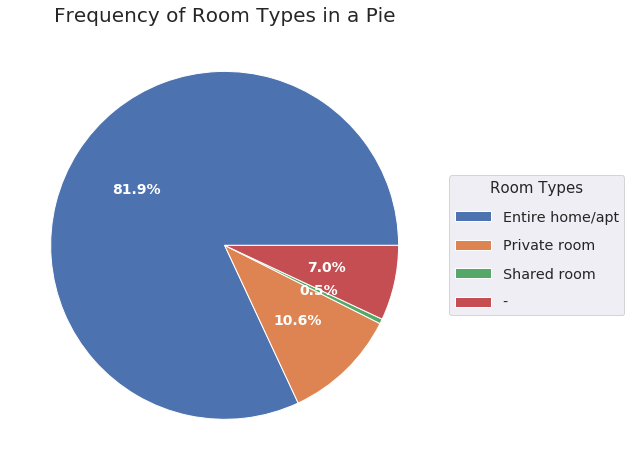

In [121]:
"""
Αναπαριστούμε τα δεδομένα μας σε μια πίτα,
προκειμένου να φανεί ξεκάθαρα ο συχνότερος τύπος 
δωματίου.
"""

fig, ax = plt.subplots(figsize=(16,8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, room_types,
          title="Room Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)

plt.setp(autotexts, size=14,weight="bold")

ax.set_title("Frequency of Room Types in a Pie",size=20)

plt.show()

Παρατηρούμε λοιπόν πως ο συχνότερος τύπος room_type για τα δεδομένα μας είναι το "Εntire home/apt", δηλαδή τα Διαμερίσματα.

## Ερώτημα 1.2

In [122]:
""" 
Αντικαθιστούμε τις τιμές με ΝaΝ και 
απαλοίφουμε τον χαρακτήρα "$" από τις στήλες με τις τιμές, 
ώστε να μπορέσουμε στην συνέχεια να βρούμε των μέσο όρο 
των 3 μηνών.
""" 
df.loc[df['price'] == '-','price'] = np.nan
df.loc[df['price_x'] == '-','price_x'] = np.nan
df.loc[df['price_y'] == '-','price_y'] = np.nan
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df["price_x"] = df["price_x"].replace('[\$,]', '', regex=True).astype(float)
df["price_y"] = df["price_y"].replace('[\$,]', '', regex=True).astype(float)
mean_febrouary = df["price_x"].mean(skipna=True)
mean_march = df["price_y"].mean(skipna=True)
mean_april = df["price"].mean(skipna=True)

print(mean_febrouary)
print(mean_march)
print(mean_april)

65.49791208791208
64.89445572054268
64.36373046268503


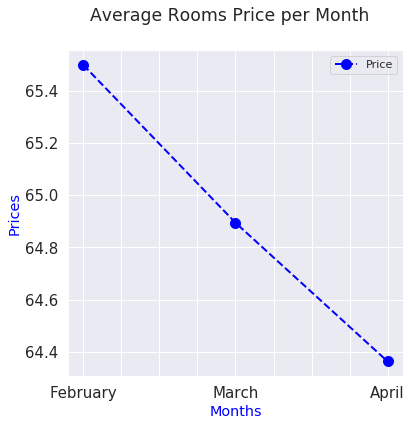

In [123]:
"""
Αναπαριστούμε τις τιμές σε μορφή διαγράμματος,
προκειμένου να φανεί η πορεία των τιμών 
ανάμεσα στους τρείς μήνες.
"""

data = [['February', mean_febrouary], ['March', mean_march], ['April', mean_april]] 
help_df = pd.DataFrame(data, columns = ['Month', 'Price'])

help_df.plot(x='Month',y='Price', figsize=(6,6), color='blue', marker='o', fontsize=15,linestyle='dashed',linewidth=2, markersize=10)
plt.suptitle('Average Rooms Price per Month',fontsize='x-large')
plt.ylabel('Prices',fontsize='large',color='blue')
plt.xlabel('Months',fontsize='large',color='blue')
plt.show()

Παρατηρούμε, λοιπόν, πως τον Φεβρουάριο οι τιμές είναι κατά μέσο όρο υψηλότερες, ενώ τον Απρίλιο οι τιμές είναι κατά μέσο όρο χαμηλότερες από τους δυο άλλους μήνες.

## Ερώτημα 1.3

In [124]:
"""
Φτιάχνουμε ένα dictionary με τις κριτικές
ανά γειτονιά και το ταξινομούμε σε φθίνουσα σειρά,
ώστε να πάρουμε τις 5 γειτονιές με τις περισσότερες
κριτικές.
"""
neigh_reviews_dict = {}

df.loc[df['number_of_reviews'] == '-','number_of_reviews'] = '0'

df["number_of_reviews"] = df['number_of_reviews'].astype(int)

for i in df.index:
    temp = df['neighbourhood'][i]
    if temp in neigh_reviews_dict:
        neigh_reviews_dict[temp] = neigh_reviews_dict[temp] + df['number_of_reviews'][i] 
    else: 
        neigh_reviews_dict[temp] = df['number_of_reviews'][i]
        
sorted_d = dict(sorted(neigh_reviews_dict.items(), key=operator.itemgetter(1),reverse=True))

datalist = []
for key,value in sorted_d.items():
    datalist.append([key,value])

df32 = pd.DataFrame(datalist,columns=['Neighbourhoods','Reviews'])
display(df32.style.hide_index())

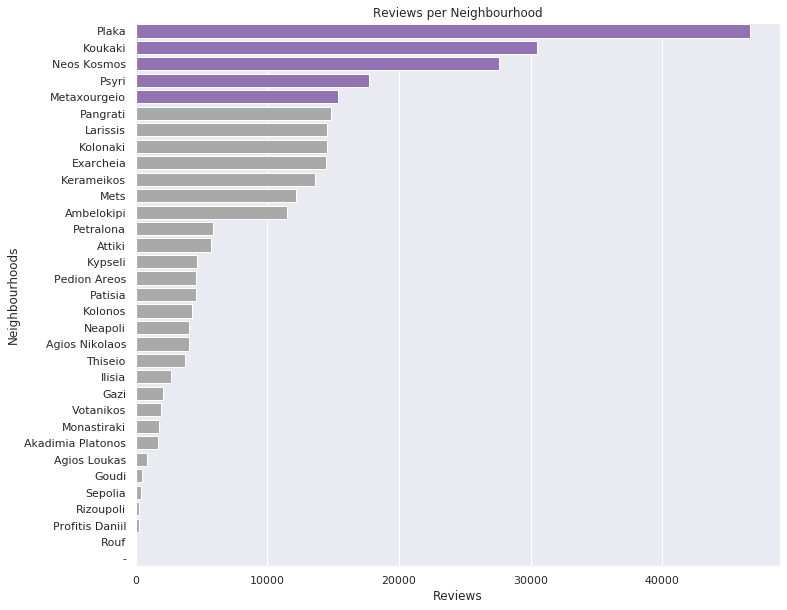

In [125]:
"""
Αναπαριστούμε τα δεδομένα με την χρήση μπαρών
και "μαυρίζουμε" τις πέντε γειτονιές με τις 
περισσότερες κριτικές.
"""

colors = ['tab:purple' if i in datalist[:5] else 'darkgrey' for i in datalist]

sns.set(rc={'figure.figsize':(len(datalist) * 0.35, 10)})
plot1 = sns.barplot(x='Reviews', y='Neighbourhoods', data=df32, palette=colors, orient='h') \
                        .set_title('Reviews per Neighbourhood')

Παρατηρούμε, λοιπόν, πως οι γειτινιές με τις περισσότερες κριτικές είναι οι:
1. Πλακα
2. Κουκάκι
3. Νέος Κόσμος
4. Ψυρρή
5. Μεταξουργείο

## Ερώτημα 1.4

In [126]:
"""
Φτιάχνουμε ένα dictionary με τον αριθμό ακινήτων 
ανά γειτονιά και το ταξινομούμε σε φθίνουσα σειρά,
ώστε να βρούμε αυτή με τον μεγαλύτερο αριθμό ακινήτων.
"""
neigh_dict = {}

for i in df.index:
    temp = df['neighbourhood'][i]
    if temp in neigh_dict:
        neigh_dict[temp] = neigh_dict[temp] + 1
    else: 
        neigh_dict[temp] = 1
        
sorted_d = dict(sorted(neigh_dict.items(), key=operator.itemgetter(1),reverse=True))

datalist = []
for key,value in sorted_d.items():
    datalist.append([key,value])

df32 = pd.DataFrame(datalist,columns=['Neighbourhoods','Number_of_Estates'])
display(df32.style.hide_index())

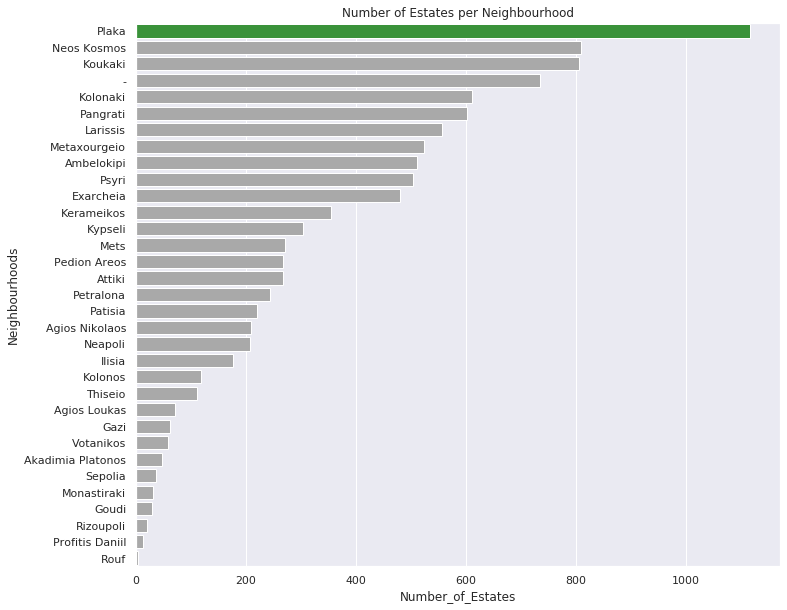

In [127]:
"""
Αναπαριστούμε τα δεδομένα με την χρήση μπαρών
και "μαυρίζουμε" τις πέντε γειτονιές με τις 
περισσότερες κριτικές.
"""    
colors = ['tab:green' if i in datalist[:1] else 'darkgrey' for i in datalist]

sns.set(rc={'figure.figsize':(len(datalist) * 0.35, 10)})
plot2 = sns.barplot(x='Number_of_Estates', y='Neighbourhoods', data=df32, palette=colors, orient='h') \
                        .set_title('Number of Estates per Neighbourhood')

Παρατηρούμε, λοιπόν, πως η γειτονιά με τον μεγαλύτερο αριθμό ακινήτων είναι με μεγάλη διαφορά η Πλάκα.

## Ερώτημα 1.5

In [128]:
"""
Αρχικά, παίρνουμε τις κατάλληλες στήλες που 
χρειάζονται για το ερώτημα και τις "γκρουπάρουμε" 
ανά γειτονιά και μετράμε τις καταχωρήσεις που 
έγιναν σε κάθε γειτονιά για κάθε μήνα.
"""
df_new = df[['neighbourhood','id','febrouary','march','april']].copy()

df_new.loc[df_new['march'] == '-','march'] = np.nan
df_new.loc[df_new['febrouary'] == '-','febrouary'] = np.nan
df_new.loc[df_new['april'] == '-','april'] = np.nan
df_new = df_new.groupby('neighbourhood').count().reset_index().sort_values(by=['id'])

display(df_new.style.hide_index())

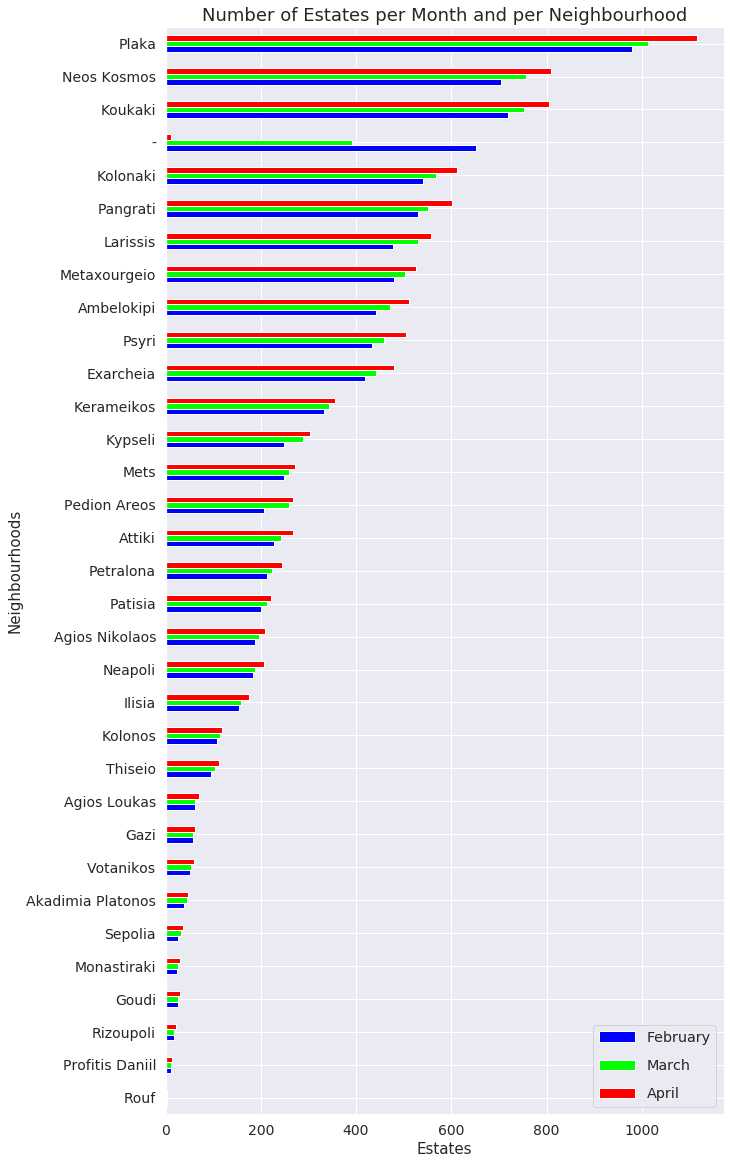

In [129]:
"""
Έπειτα, αναπαριστούμε την παραπάνω πληροφορία
σε μορφή μπαρών, όπου στον άξονα y βάλαμε τις 
γειτονιές, στον άξονα x τις τιμές των ακινήτων 
και κάθε γειτονία συνοδεύεται από τρείς μπάρες
που αντιπροσωπεύουν τους μήνες.
"""

sortedneighbourhoods = []
sortedneighbourhoods = df_new["neighbourhood"].to_list()

feb_estates = []
feb_estates = df_new["febrouary"].to_list()
mar_estates = []
mar_estates = df_new["march"].to_list()
apr_estates = []
apr_estates = df_new["april"].to_list()

my_colors = list(islice(cycle(['blue', 'lime', 'red']), None, len(df)))

df_res = pd.DataFrame({'February': feb_estates,'March': mar_estates, 'April': apr_estates}, index=sortedneighbourhoods)
ax = df_res.plot.barh(figsize=(10,20),fontsize=14,title='Number of Estates per Month and per Neighbourhood', color=my_colors)
ax.title.set_size(18)
ax.set_xlabel("Estates",size=15)
ax.set_ylabel("Neighbourhoods",size=15)
ax.legend(handlelength=2.5, labelspacing=1, fontsize='large')


Εδώ παρατηρούμε πως για ακόμα μια φορά η Πλάκα έρχεται πρώτη σε αριθμό ακινήτων για όλους τους μήνες με σχετικά μεγάλη διαφορά με τις αλλες γειτονιές.

## Ερώτημα 1.6

In [130]:
"""
Εδώ προκειμένου να φτιάξουμε το ιστόγραμμα 
της στήλης neighbourhood, μαζέψαμε τις καταχωρήσεις 
ακινήτων ανά γειτονιά.
"""

df_new = df[['neighbourhood','id'].copy()]
df_new = df_new.groupby('neighbourhood').count().reset_index()
display(df_new.style.hide_index())

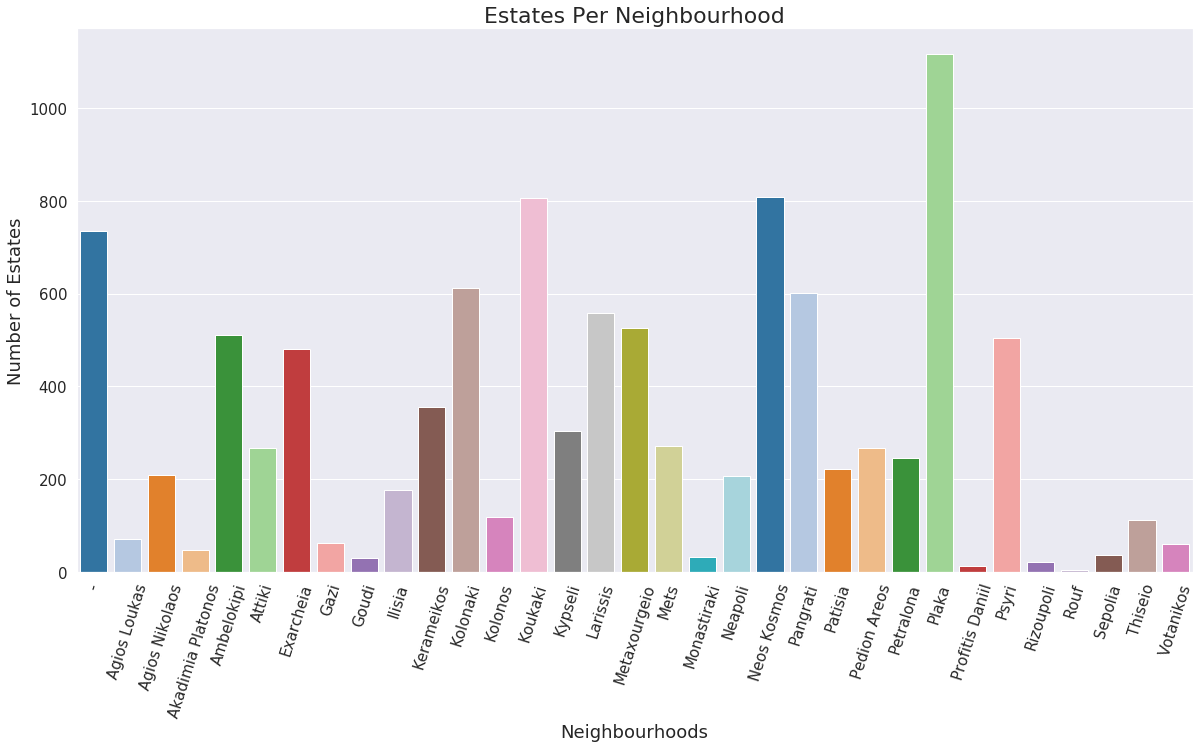

In [131]:
"""
Αναπαραστήσαμε την παραπάνω πληροφορία 
με την μορφή μπαρών.
"""

sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x='neighbourhood', y='id', data=df_new, palette='tab20')\
                    .set_title('Estates Per Neighbourhood',fontsize=22)

plt.xticks(rotation=72.5)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Number of Estates', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

Παρατηρούμε, πως η Πλάκα έχει τις περισσότερες καταχωρήσεις καταλυμάτων.

## Ερώτημα 1.7

In [132]:
"""
Εδώ "γκρουπάρουμε" τα δεδομένα μας με βάση την γειτονιά
και το room_type, μετράμε τις καταχωρήσεις δωματίων ανά
room_type και ταξινομούμε το αποτέλεσμα για να βρούμε
τον πιο συχνό τύπο δωματίου ανά γειτονιά.
"""

df_new = df[['id','neighbourhood','room_type'].copy()]
df_new = df_new.groupby(['neighbourhood','room_type']).count().reset_index().sort_values(by=['id'])
pd.set_option('display.max_rows', 100)
display(df_new.style.hide_index())

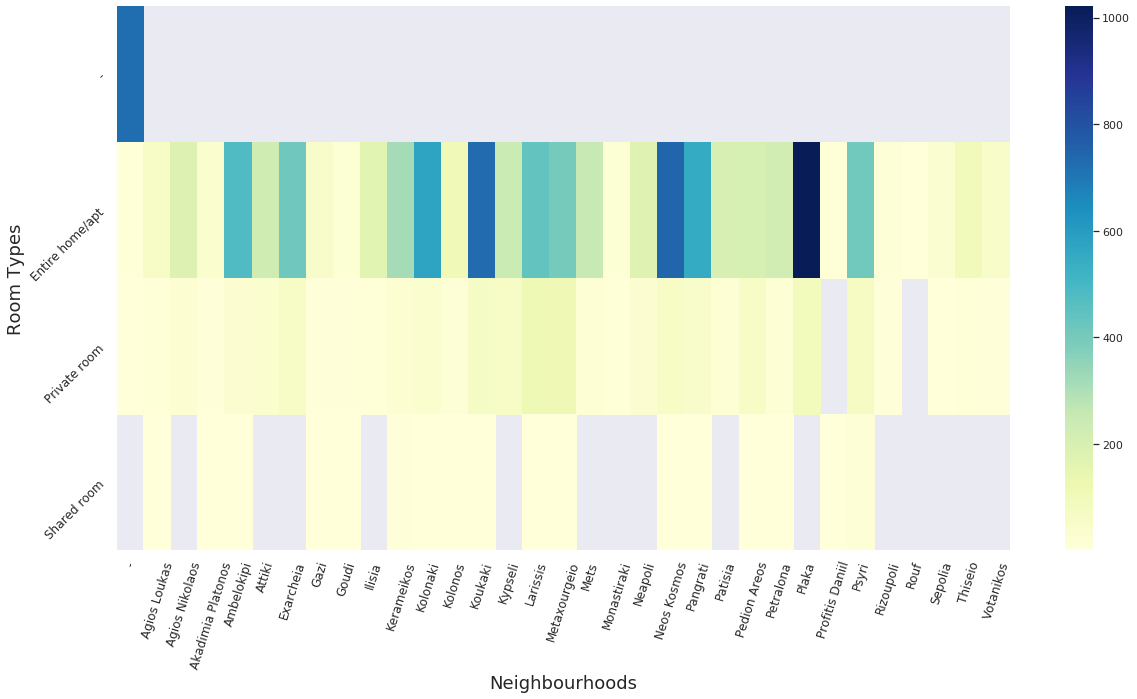

In [133]:
"""
Εδώ αποφασίσαμε να αναπαραστήσουμε τα 
παραπάνω δεδομένα σε heatmap, προκειμένου 
να φανεί σε κάθε γειτονία το συχνότερος
τύπος δωματίων
"""

heatmap = pd.pivot_table(df_new, values='id',index=['room_type'],columns='neighbourhood')

sns.heatmap(heatmap,fmt="d",cmap="YlGnBu")
plt.xticks(rotation=72.5)
plt.yticks(rotation=45)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Room Types', fontsize=18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

Παρατηρούμε πως για κάθε γειτονιά, σχεδόν πάντα ο συχνότερος τύπος δωματίου είναι το Διαμέρισμα.
Θα αναπαραστήσουμε, όμως, ξανά την παραπάνω πληροφορία, χωρίς τα δεδομένα που δεν έχουν τιμές, δηλαδή τα ΝaΝ,
προκειμένου να γίνει πιο ξεκάθαρο το αποτέλεσμα (καθώς δεν μας ενδιαφέρει και τόσο σε αυτό το παράδειγμα να εμφανίσουμε τις πληροφορίες για τις γειτονιές και τα δωμάτια που δεν έχουν δωθεί τιμές)

In [134]:
df_new = df_new[(df_new[['neighbourhood','room_type']] != '-').all(axis=1)]
display(df_new.style.hide_index())

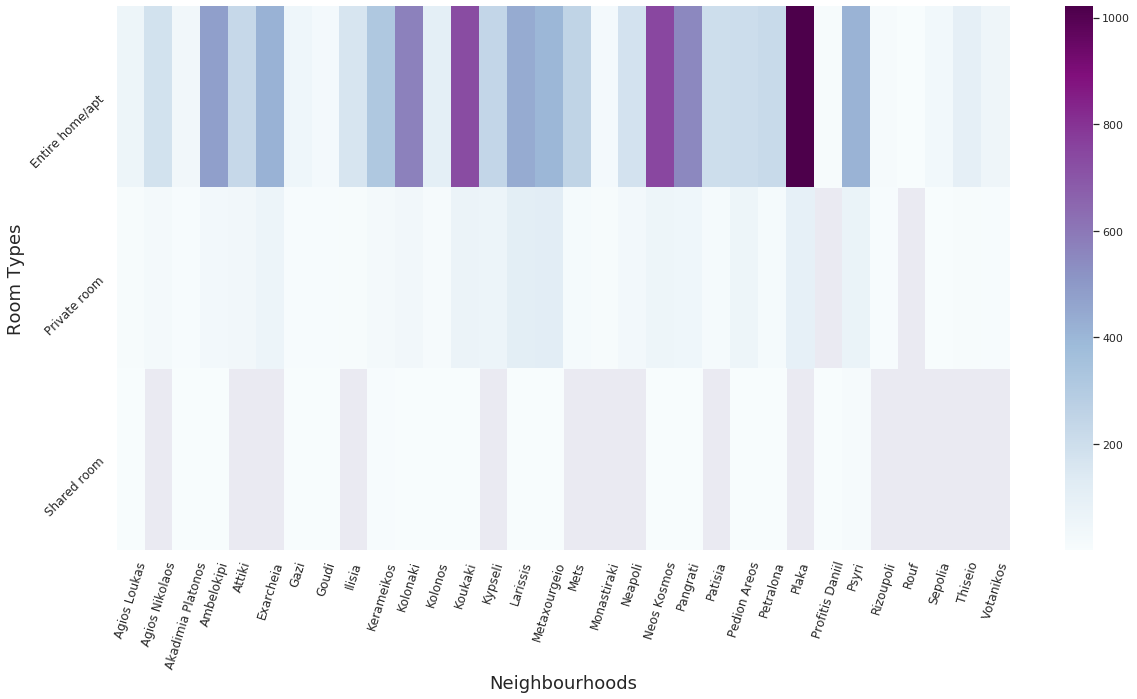

In [135]:
heatmap = pd.pivot_table(df_new, values='id',index=['room_type'],columns='neighbourhood')

sns.heatmap(heatmap, cmap="BuPu")
plt.xticks(rotation=72.5)
plt.yticks(rotation=45)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Room Types', fontsize=18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

## Ερώτημα 1.8

In [136]:
"""
Εδώ βρίσκουμε τον μέσο όρο των τιμών 
για κάθε δωμάτιο από όλους τους μήνες
και τις ταξινομουμε σε φθίνουσα σειρά.
"""
df_new = df[['id','room_type','price','price_x','price_y'].copy()]
#Create a new colunm with the average of prices of the 3 months
df_new['mean_price'] = df_new[['price','price_x','price_y']].mean(axis=1)
#Drop the columns that we don;t need anymore.
df_new.drop(['price','price_x','price_y','id'], axis=1,inplace=True)

df_new = df_new.groupby('room_type').mean().reset_index().sort_values(by=['mean_price'])

display(df_new.style.hide_index())

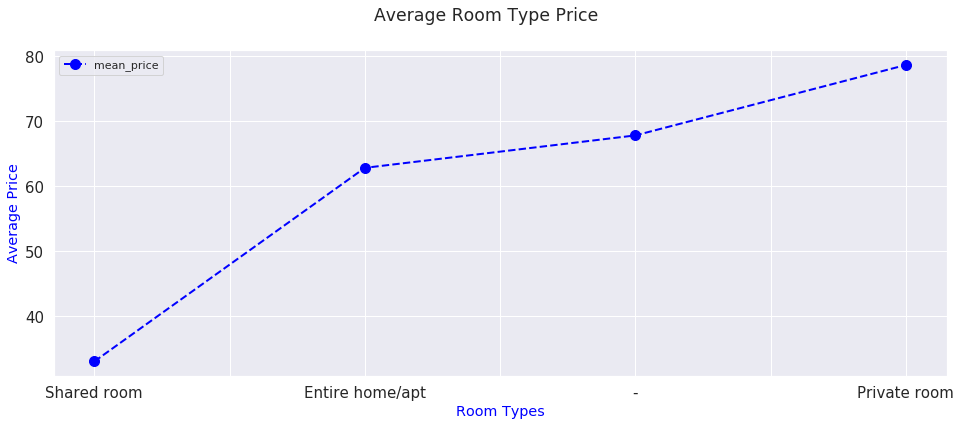

In [137]:
"""
Aναπαριστούμε την παραπάνω πληροφορία 
σε μορφή διαγράμματος ώστε να φαίνεται
η πορεία των τιμών του κάθε τύπου δωματίου.
"""

df_new.plot(x='room_type',y='mean_price', figsize=(16,6), color='blue', marker='o', fontsize=15,linestyle='dashed',linewidth=2, markersize=10)
plt.suptitle('Average Room Type Price',fontsize='x-large')
plt.ylabel('Average Price',fontsize='large',color='blue')
plt.xlabel('Room Types',fontsize='large',color='blue')
plt.show()

Παρατηρούμε, λοιπόν, ότι ο πιο ακριβός τύπος δωματίου είναι το "Private Room", ενώ ο φθινότερος το "Shared room".

## Ερώτημα 1.9

In [138]:
"""
Eδώ αξιοποιήσαμε την βιβλιοθήκη Folium Map
για να αναπαραστήσουμε μέσα από τις στήλες 
latitude και longitude τον χάρτη με τα ακίνητα.
"""

df_new = df[['id','latitude','longitude','room_type'].copy()]
df_new.loc[df_new['latitude'] == '-','latitude'] = np.nan
df_new.loc[df_new['longitude'] == '-','longitude'] = np.nan
df_new.loc[df_new['room_type'] == '-','room_type'] = np.nan
df_new.dropna(axis=0,inplace=True)

In [139]:
"""
Για τα pop up στον χάρτη επιλέξαμα να
δίνει την πληροφορία για το είδος του 
δωματίου που προσφέρει.
"""

locations = df_new[['latitude', 'longitude']]
locationlist = locations.values.tolist()

map = folium.Map(location=[37.98888, 23.76431], zoom_start=14)
for point in range(0, 500):
    folium.Marker(locationlist[point], popup=df_new['room_type'][point]).add_to(map)

map.save('map.html')
map

## Ερώτημα 1.10

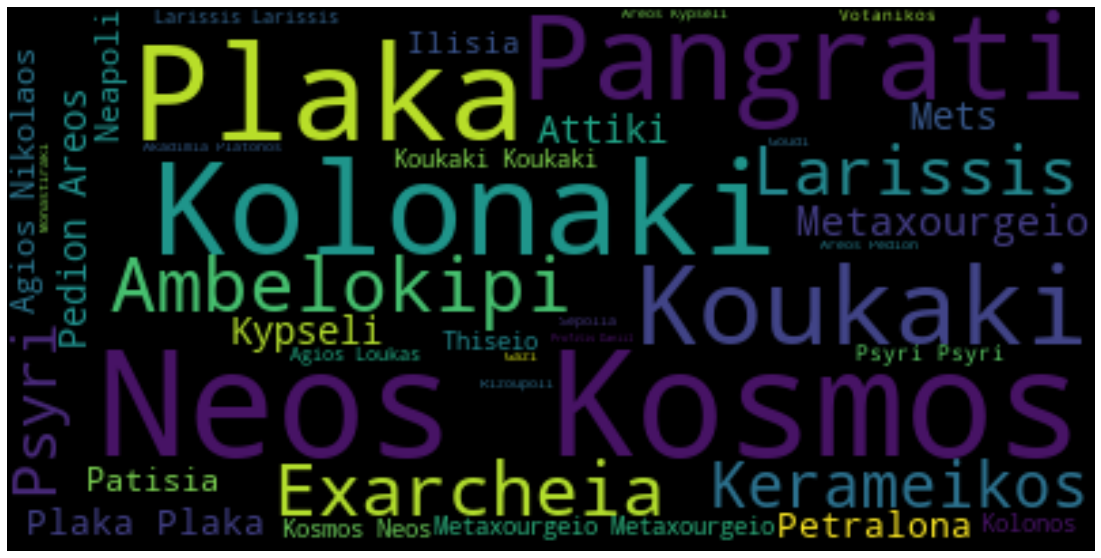

In [140]:
"""
Wordcloud για την στήλη neighbourhood.
"""

text = " ".join(str(n) for n in df['neighbourhood'])
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

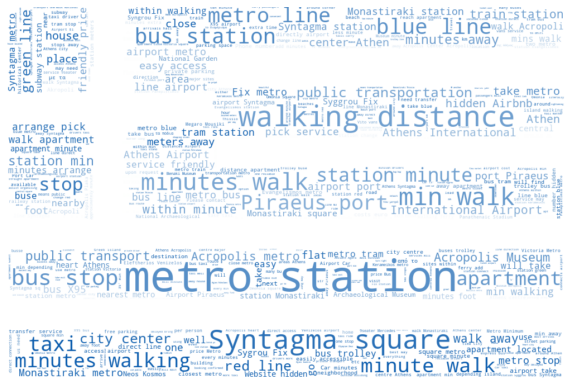

In [141]:
"""
Wordcloud για την στήλη transit.
"""

text = " ".join(str(n) for n in df['transit'])
mask = np.array(Image.open("/home/alexa/Documents/Data_Mining/ERGASIA_1/greece.jpg"))
wordcloud_spa = WordCloud(width = 512, height = 512,stopwords=STOPWORDS,background_color="white",mode="RGB", max_words=500, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("/home/alexa/Documents/Data_Mining/ERGASIA_1/Greece.png", format="png")
plt.show()

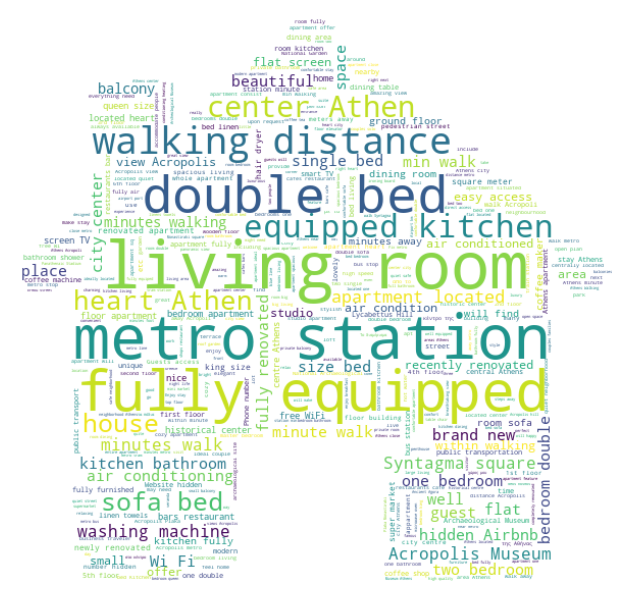

In [142]:
"""
Wordcloud για την στήλη description.
"""

text = " ".join(str(n) for n in df['description'])
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, max_words=500, stopwords=STOPWORDS, background_color='white', mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
generate_wordcloud(text, mask)

In [143]:
"""
Wordcloud για την στήλη comments.
Eδώ συγχωνεύσαμε το listings.csv με
το reviews.csv με βάση το date, προκειμένου
να πάρουμε τα comments.
"""

path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/april/reviews.csv'

df1 = pd.read_csv(path, usecols = ['date','comments'])
last_review_date = df[['last_review'].copy()]

last_review_date[last_review_date.last_review != '-']
last_review_date.rename(columns = {'last_review':'date'}, inplace = True) 
df15 = pd.merge(df1, last_review_date, how='inner',on = 'date')
df15.drop_duplicates(subset='comments', keep='first',inplace = True)

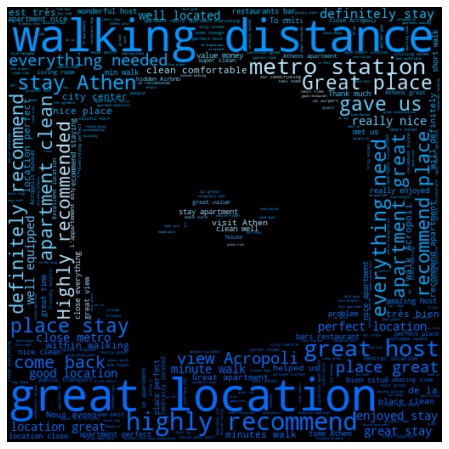

In [144]:
text = " ".join(str(n) for n in df15['comments'])
mask = np.array(Image.open("/home/alexa/Documents/Data_Mining/ERGASIA_1/mes.png"))
wordcloud_spa = WordCloud(width = 512, height = 512,background_color="black",stopwords=STOPWORDS, max_words=500, mask=mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("/home/alexa/Documents/Data_Mining/ERGASIA_1/Greece.png", format="png")
plt.show()

## Ερώτημα 1.12

In [145]:
"""
Σε αυτό το ερώτημα βρήκαμε τον μέσο όρο 
σκορ κριτικών ανά γειτονιά.
"""
new_df = df[['id','neighbourhood','review_scores_rating','review_scores_rating_x','review_scores_rating_y'].copy()]
new_df = new_df.replace('-', np.nan)
new_df = new_df.dropna()
new_df['mean_score'] = new_df[['review_scores_rating','review_scores_rating_x','review_scores_rating_y']].mean(axis=1)
# # df_new.loc[:,'mean_price'] = df_new.loc[:,('price','price_x','price_y')].mean(axis=1)
new_df.drop(['review_scores_rating','review_scores_rating_x','review_scores_rating_y','id'], axis=1,inplace=True)
new_df = new_df.groupby('neighbourhood').mean().reset_index().sort_values(by=['mean_score'])

display(new_df.style.hide_index())

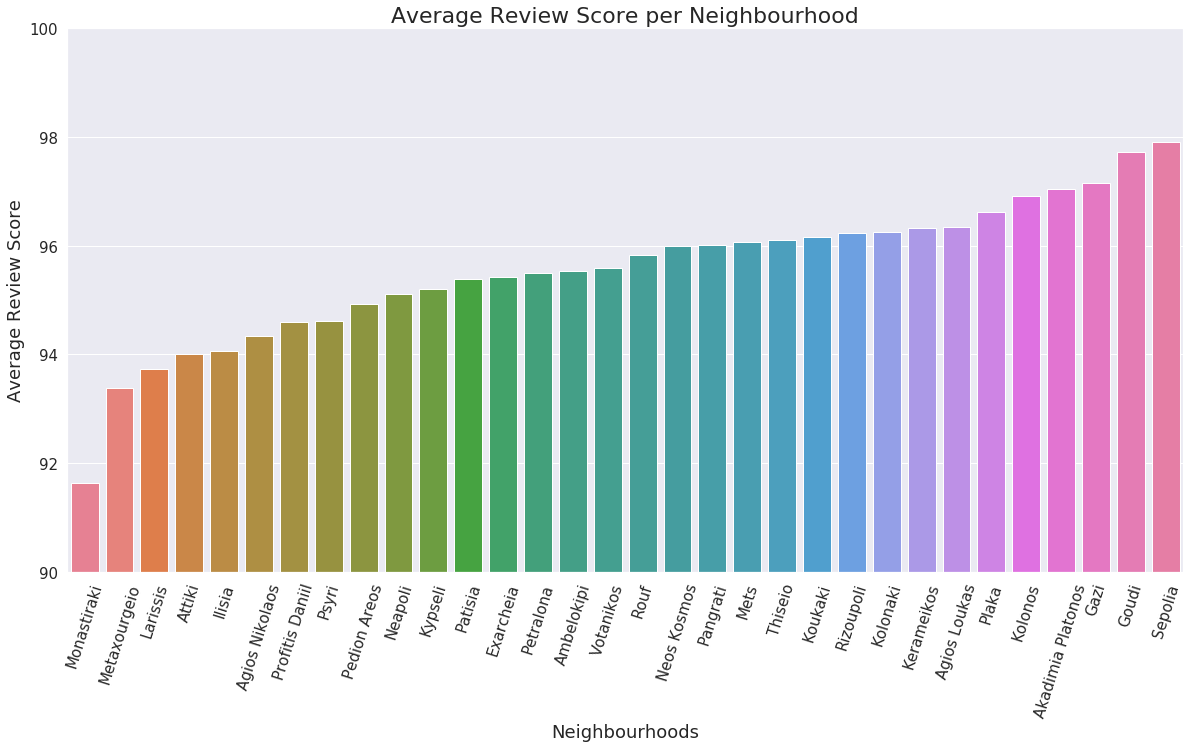

In [146]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x='neighbourhood', y='mean_score', data=new_df, palette='husl')\
                    .set_title('Average Review Score per Neighbourhood',fontsize=22)
plt.ylim(90,100)
plt.xticks(rotation=72.5)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Average Review Score', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

Παρατηρούμε πως οι γειτονιές με τις καλύτερες κριτικές είναι τα Σεπόλια και το Γουδί.

In [147]:
"""
Σε αυτό το ερώτημα αναπαραστήσαμε το
ποσοστό σε μπάνια ανά τύπο δωματίου.
"""

new_df = df[['id','room_type','bathrooms'].copy()]
new_df = new_df.replace('-', np.nan)
new_df = new_df.dropna()
new_df = new_df.groupby(['room_type','bathrooms']).count().reset_index()

display(new_df.style.hide_index())

apt1 = (new_df[(new_df['room_type'] == 'Entire home/apt') & (new_df['bathrooms'] <= 1)]).sum()
apt2 = (new_df[(new_df['room_type'] == 'Entire home/apt') & (new_df['bathrooms'] > 1) & (new_df['bathrooms'] <= 2)]).sum()
apt3 = (new_df[(new_df['room_type'] == 'Entire home/apt') & (new_df['bathrooms'] > 2)]).sum()

shr1 = (new_df[(new_df['room_type'] == 'Shared room') & (new_df['bathrooms'] <= 1)]).sum()
shr2 = (new_df[(new_df['room_type'] == 'Shared room') & (new_df['bathrooms'] > 1) & (new_df['bathrooms'] <= 2)]).sum()
shr3 = (new_df[(new_df['room_type'] == 'Shared room') & (new_df['bathrooms'] > 2)]).sum()

prv1 = (new_df[(new_df['room_type'] == 'Private room') & (new_df['bathrooms'] <= 1)]).sum()
prv2 = (new_df[(new_df['room_type'] == 'Private room') & (new_df['bathrooms'] > 1) & (new_df['bathrooms'] <= 2)]).sum()
prv3 = (new_df[(new_df['room_type'] == 'Private room') & (new_df['bathrooms'] > 2)]).sum()

baths = ['0-1', '1-2', '2+']
apt = [apt1['id'],apt2['id'],apt3['id']]
shr = [shr1['id'],shr2['id'],shr3['id']]
prv = [prv1['id'],prv2['id'],prv3['id']]

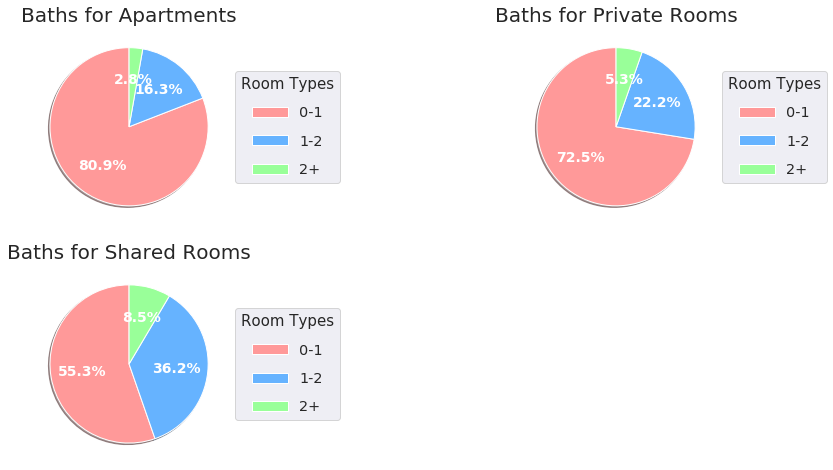

In [148]:
fig, ax = plt.subplots(2, 2,figsize=(16,8), subplot_kw=dict(aspect="equal"))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

wedges, texts, autotexts = ax[0,0].pie(apt, autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,textprops=dict(color="w"))
ax[0,0].legend(wedges, baths,title="Room Types",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)
plt.setp(autotexts, size=14,weight="bold")
ax[0,0].set_title("Baths for Apartments",size=20)

wedges, texts, autotexts = ax[0,1].pie(prv, autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,textprops=dict(color="w"))
ax[0,1].legend(wedges, baths,title="Room Types",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)
plt.setp(autotexts, size=14,weight="bold")
ax[0,1].set_title("Baths for Private Rooms",size=20)

wedges, texts, autotexts = ax[1,0].pie(shr, autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,textprops=dict(color="w"))
ax[1,0].legend(wedges, baths,title="Room Types",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)
plt.setp(autotexts, size=14,weight="bold")
ax[1,0].set_title("Baths for Shared Rooms",size=20)


ax[1,1].remove()


plt.show()

Παρατηρούμε γενικά πως σε όλους τους τύπους δωματίων επικρατούν τα 0-1 μπάνια, ακολουθούν τα 1-2 μπάνια
και τέλος τα δωμάτια με πάνω από δύο μπάνια σε αρκετά μικρότερο ποσοστό.